In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
import datetime
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('CPI_HistoryMar_23.csv')
df.head(5)

,Month,Category,Value,Percentage Change (From Prior Month)
0,31-03-2023,Headline_CPI,109.0,1.0
1,31-03-2023,Food and non-alcoholic beverages,116.7,1.0
2,31-03-2023,Alcoholic beverages and tobacco,109.2,2.2
3,31-03-2023,Clothing and footwear,103.4,-0.1
4,31-03-2023,Housing and utilities,104.5,0.4


In [93]:
# Convert the "Month" column to a datetime type for time-based analysis
df['Month'] = pd.to_datetime(df['Month'], format='%d-%m-%Y')  # Use '%d-%m-%Y' for 'DD-MM-YYYY'

# Set the "Month" column as the index
df.set_index('Month', inplace=True)

In [94]:

# Extract day, month, and year columns
# Extract day, month, and year columns
df['day'] = df.index.day
df['month_num'] = df.index.month
df['year'] = df.index.year
df.head(5)

,Category,Value,Percentage Change (From Prior Month),day,month_num,year
Month,,,,,,
2023-03-31,Headline_CPI,109.0,1.0,31,3,2023
2023-03-31,Food and non-alcoholic beverages,116.7,1.0,31,3,2023
2023-03-31,Alcoholic beverages and tobacco,109.2,2.2,31,3,2023
2023-03-31,Clothing and footwear,103.4,-0.1,31,3,2023
2023-03-31,Housing and utilities,104.5,0.4,31,3,2023


---
# 1) Trend Analysis

# a) Calculate and visualize the overall CPI trend

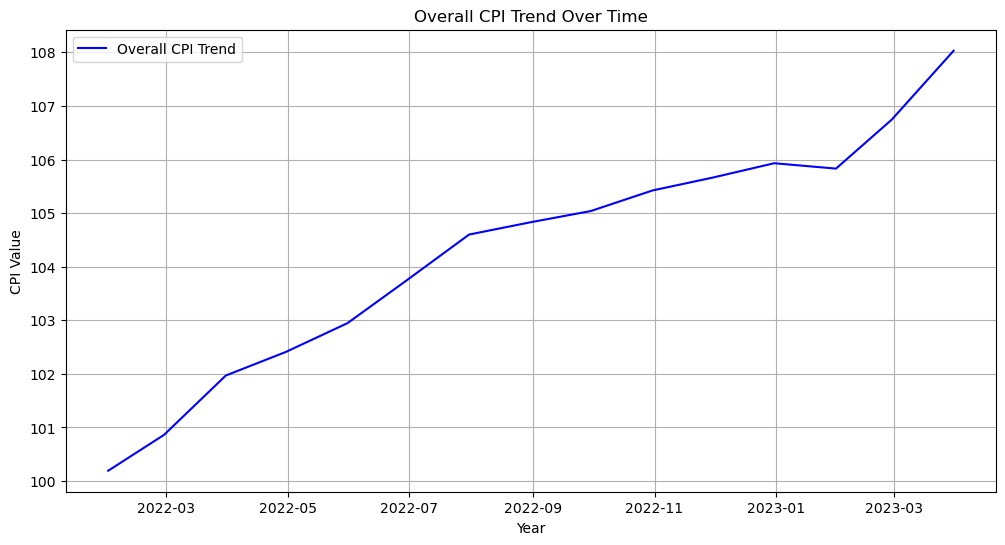

In [95]:
# Calculate the overall CPI trend by averaging all categories
overall_cpi = df.groupby(df.index)['Value'].mean()

# Plot the overall CPI trend
plt.figure(figsize=(12, 6))
plt.plot(overall_cpi.index, overall_cpi.values, label='Overall CPI Trend', color='blue')
plt.title('Overall CPI Trend Over Time')
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.legend()
plt.grid(True)
plt.show()


# b) Seasonal Patterns and Long-Term Trends

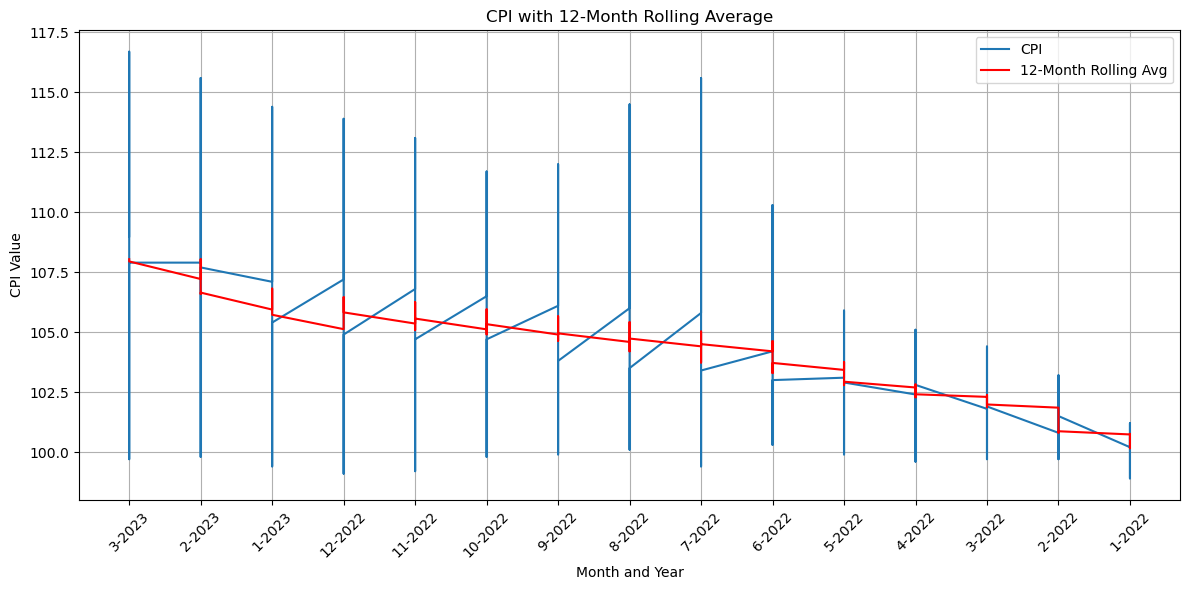

In [96]:
# Combine 'month_num' and 'year' to create a custom x-axis label
df['month_year'] = df['month_num'].astype(str) + '-' + df['year'].astype(str)

# Calculate a 12-month rolling average
rolling_avg = df['Value'].rolling(window=12).mean()

# Plot the original CPI and the rolling average
plt.figure(figsize=(12, 6))
plt.plot(df['month_year'], df['Value'], label='CPI')
plt.plot(df['month_year'], rolling_avg, label='12-Month Rolling Avg', color='red')
plt.title('CPI with 12-Month Rolling Average')
plt.xlabel('Month and Year')
plt.ylabel('CPI Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()  # Ensure the labels fit in the plot area
plt.show()




---
# What are the months with the highest and lowest percentage changes from the prior month?

In [97]:
max_percentage_change = df['Percentage Change (From Prior Month)'].max()
min_percentage_change = df['Percentage Change (From Prior Month)'].min()

max_change_month = df[df['Percentage Change (From Prior Month)'] == max_percentage_change]['month_num'].iloc[0]
min_change_month = df[df['Percentage Change (From Prior Month)'] == min_percentage_change]['month_num'].iloc[0]

print(f'Max Percentage Change: {max_percentage_change}% in {max_change_month}')
print(f'Min Percentage Change: {min_percentage_change}% in {min_change_month}')

Max Percentage Change: 5.7% in 3
Min Percentage Change: -3.5% in 1


---
# Category Analysis



# a) Which categories contribute the most to CPI changes:

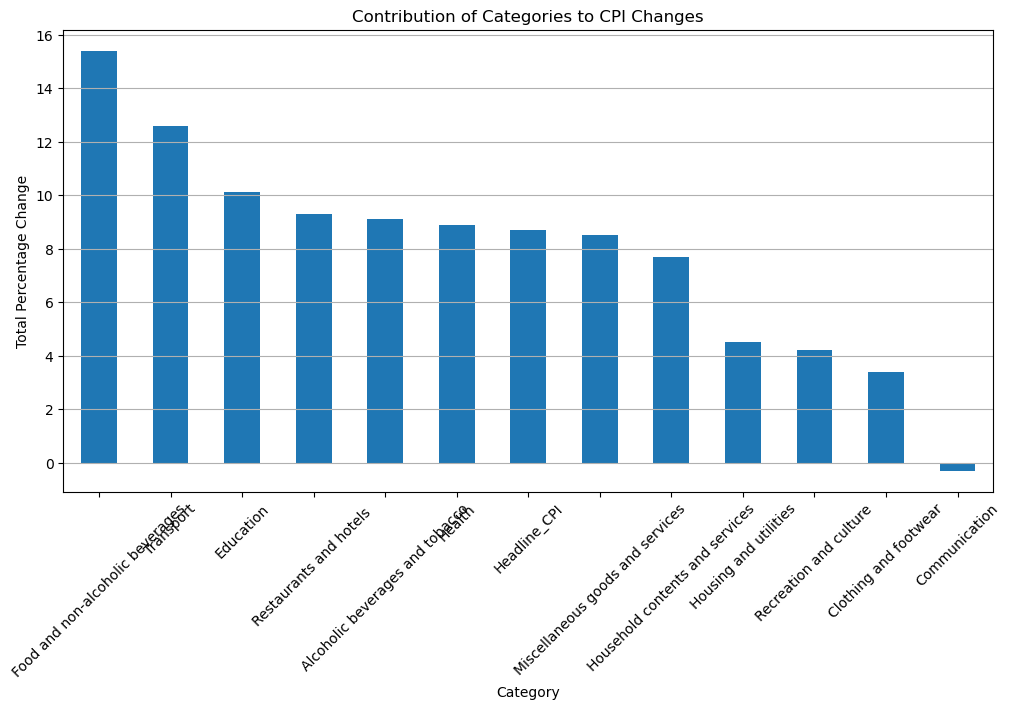

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded as 'df'

# Group by 'Category' and calculate the sum of percentage changes
category_changes = df.groupby('Category')['Percentage Change (From Prior Month)'].sum().sort_values(ascending=False)

# Create a bar chart to visualize the contributions
plt.figure(figsize=(12, 6))
category_changes.plot(kind='bar')
plt.title('Contribution of Categories to CPI Changes')
plt.xlabel('Category')
plt.ylabel('Total Percentage Change')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



# b)How percentage changes in different categories vary over time

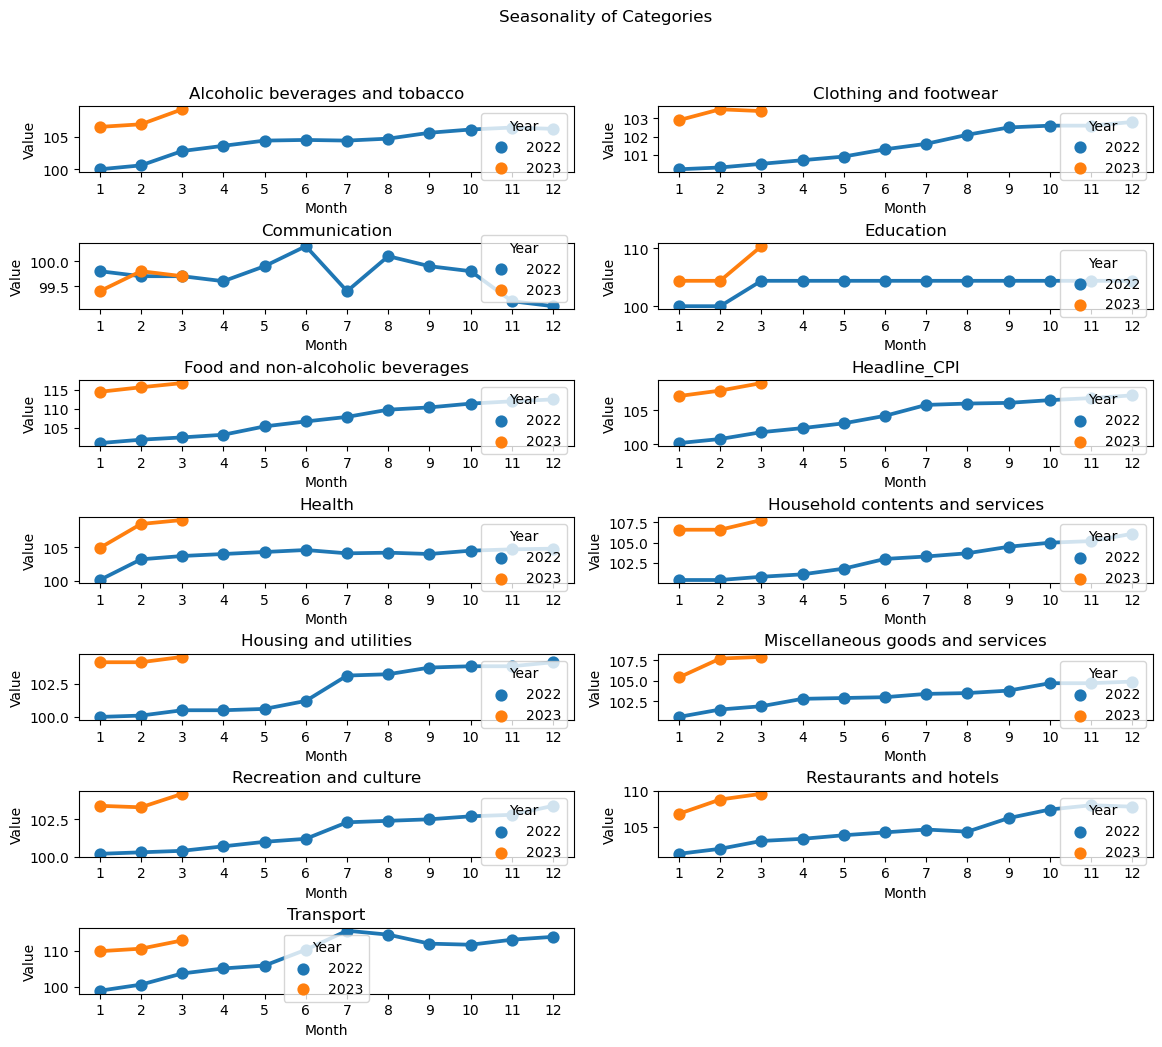

In [107]:
import math
# Create a temporary dataframe with Month and Year columns
df = cpi_pivot.copy()
df['Year'] = pd.DatetimeIndex(df['Month']).year
df['Month'] = pd.DatetimeIndex(df['Month']).month

# Define the categories to plot
categories_to_plot = cpi_pivot.columns[1:]

# Create subplots
num_categories = len(categories_to_plot)
num_rows = math.ceil(num_categories / 2)
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Iterate over each category and plot its seasonality
for i, category in enumerate(categories_to_plot):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]

    sns.pointplot(x='Month', y=category, hue='Year', data=df_temp, ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Hide any unused subplots
for i in range(num_categories, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.axis('off')

plt.suptitle('Seasonality of Categories', y=1.05)
plt.show()


---
# currency data

In [100]:
df = pd.read_csv('currency_data.csv')
df.head(5)

,Date,USD/ZAR,GBP/ZAR,EUR/ZAR
0,2018-01-01,12.310454,16.640806,14.7787
1,2018-01-02,12.390942,16.744291,14.8840
2,2018-01-03,12.434303,16.906560,14.9995
3,2018-01-04,12.360366,16.702070,14.8448
4,2018-01-05,12.292153,16.663372,14.8354


In [101]:
# Convert the "Date" column to a datetime type with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Use '%Y-%m-%d' for 'YYYY-MM-DD'

# Set the "Date" column as the index
df.set_index('Date', inplace=True)

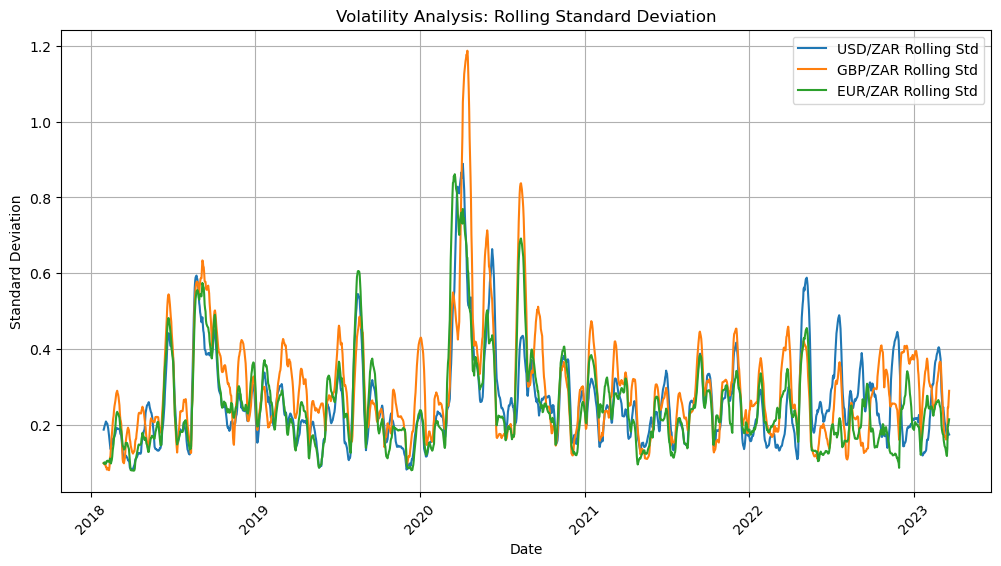

In [102]:
# Calculate rolling standard deviation for each currency pair
rolling_std_usd = df['USD/ZAR'].rolling(window=30).std()
rolling_std_gbp = df['GBP/ZAR'].rolling(window=30).std()
rolling_std_eur = df['EUR/ZAR'].rolling(window=30).std()

# Plot rolling standard deviations
plt.figure(figsize=(12, 6))
plt.plot(df.index, rolling_std_usd, label='USD/ZAR Rolling Std')
plt.plot(df.index, rolling_std_gbp, label='GBP/ZAR Rolling Std')
plt.plot(df.index, rolling_std_eur, label='EUR/ZAR Rolling Std')
plt.title('Volatility Analysis: Rolling Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()




# Correlation Analysis:



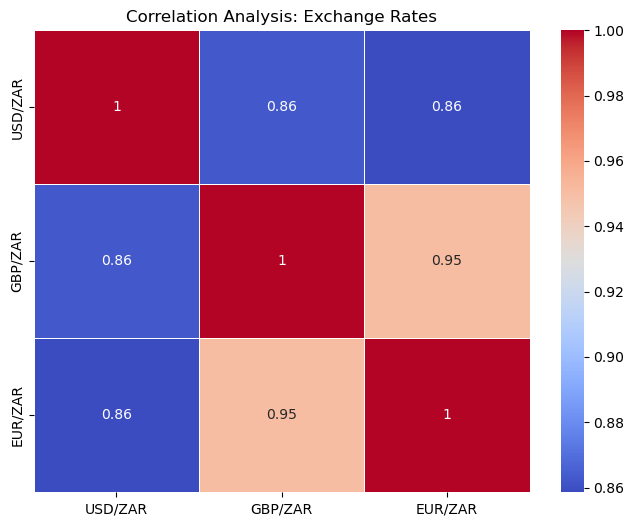

In [103]:
# Calculate correlation coefficients
correlation_matrix = df[['USD/ZAR', 'GBP/ZAR', 'EUR/ZAR']].corr()

# Create a heatmap to visualize correlations
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Analysis: Exchange Rates')
plt.show()

In [108]:
df = pd.read_csv('Naamsa_Vehicle_Sales.csv')
df.head(5)

,Month,Local_Passenger_Vehicles,Export_Sales_Passenger_Vehicles,Local_Light_Commercial_Vehicles,Export_Sales_Light_Commercial_Vehicles,Local_Medium_Commercial_Vehicles,Export_Sales_Medium_Commercial_Vehicles,Local_Heavy_Commercial_Vehicles,Export_Sales_Heavy_Commercial_Vehicles,Local_Extra_Heavy_Commercial_Vehicles,Export_Sales_Extra_Heavy_Commercial_Vehicles,Local_Bus_Sales,Export_Sales_Buses,Total_Local Sales,Total_Export_Sales
0,23-Mar,31631,23481,15529,10578,870,18,491,32,1593,25,43,0,50157,34134
1,23-Feb,29976,20079,12972,10244,697,33,435,8,1244,40,28,5,45352,30409
2,23-Jan,31072,11227,10622,9243,461,5,331,28,976,29,47,4,43509,20536
3,22-Dec,28793,16844,10438,9406,865,15,417,11,1198,26,72,0,41783,26302
4,22-Nov,32859,23522,13477,10710,900,32,546,13,1551,33,80,0,49413,34310
